In [337]:
import numpy as np
import matplotlib.pyplot as plt

In [338]:
#input patterns
p1 = [-1, -1, +1, -1, +1, -1, -1, +1]
p2 = [-1, -1, -1, -1, -1, +1, -1, -1]
p3 = [-1, +1, +1, -1, -1, +1, -1, +1]

#distorted inputs
p1d = [+1, -1, +1, -1, +1, -1, -1, +1]
p2d = [+1, +1, -1, -1, -1, +1, -1, -1]
p3d = [+1, +1, +1, -1, +1, +1, -1, +1]

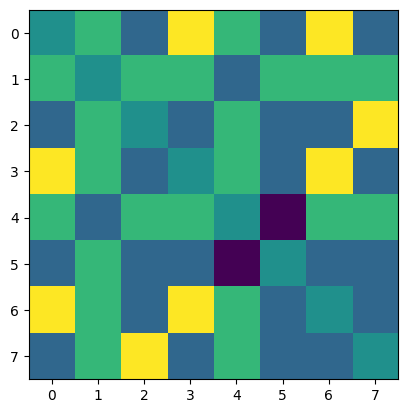

In [339]:
#storage phase
size = len(np.outer(p1,p1))

#weight matrix:
w = (1/len(p1))*((np.outer(p1,p1)+np.outer(p2,p2)+np.outer(p3,p3))-3*np.identity(size))

plt.imshow(w)

In [340]:
#function that takes in input a probe vector, and the correct memory vector it should converge to
def retrieval(x, p_in, colormap):
    #initialization

  
    #iteration until convergence
    epochs = 100 #max number of epochs

    #arrays to store values of energy and overlaps
    E_hist = []
    m1_hist = []
    m2_hist = []
    m3_hist = []

    a_hist = np.copy(x)

    for N in range (epochs):

        xold = np.copy(x) #store values of neurons in order to compare with next epoch

        i = np.random.permutation(len(x)) #to choose neurons in random order
        for j in i:
            x[j] = np.sign(np.dot(w[j,:], x)) #apply the update equation

            a_hist = np.vstack((a_hist, x))

            #commpute overlap functions 
            m1 = 1/len(p1)*np.dot(p1,x)
            m2 = 1/len(p2)*np.dot(p2,x)
            m3 = 1/len(p3)*np.dot(p3,x)
            m1_hist = np.append(m1_hist, m1)
            m2_hist = np.append(m2_hist, m2)
            m3_hist = np.append(m3_hist, m3)

            #compute Energy
            E = -0.5*np.dot(x,np.dot(w,x))
            E_hist = np.append(E_hist, E)

        #if in one epoch no neuron changes its value, stop iterting (fixed point reached)
        if np.array_equal(x, xold):
            print('stop iterating') 
            break

    #make plots
    plt.figure(figsize=(5,10))
    plt.subplot(3,1,1)
    plt.title('Energy')
    t=np.arange(0,len(E_hist))
    plt.plot(t, E_hist, label = 'E', color = 'black')
    plt.xlabel('Update #')
    plt.ylabel('Energy function')

    plt.subplot(3,1,2)
    plt.title('Overlaps')
    plt.plot(t, m1_hist, label = '1', color = 'blue')
    plt.plot(t, m2_hist, label = '2', color = 'red')
    plt.plot(t, m3_hist, label = '3', color = 'green')

    plt.xlabel('Update #')
    plt.ylabel('Overlap function')
    plt.legend()

    #measure ofdiscrepancy (calculate the number of elements that differ between the reconstructed array and the input)
    d = 0
    for i in range(len(x)):
        if x[i] != p_in[i]:
            d = d+1
    print(f'Discrepancy = {d}')

    print(x)

    plt.subplot(3,1,3)
    plt.title(f'Neuron activations in time - final discrepancy = {d}')
    plt.imshow(a_hist.T, cmap = colormap)
    plt.xlabel('Update #')
    plt.ylabel('Neuron #')
    plt.tight_layout()


stop iterating
Discrepancy = 0
[-1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0]
stop iterating
Discrepancy = 4
[1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0]
stop iterating
Discrepancy = 5
[1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0]


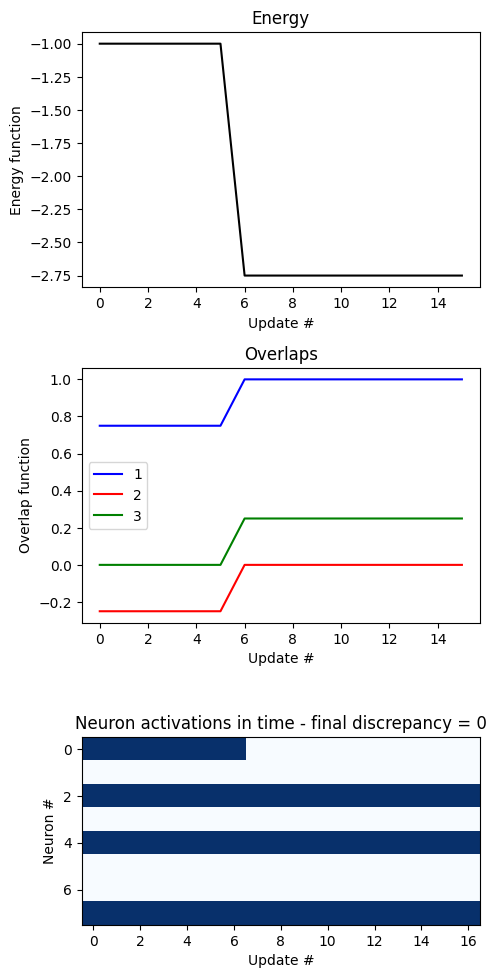

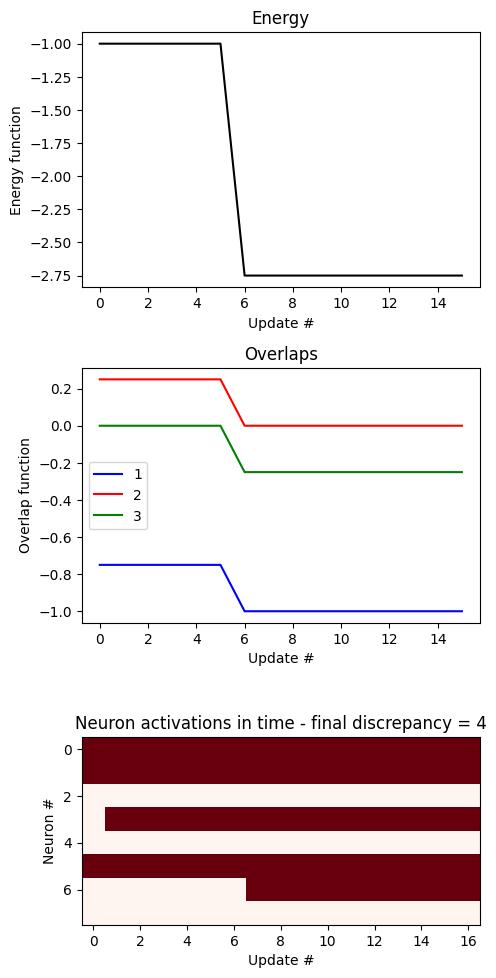

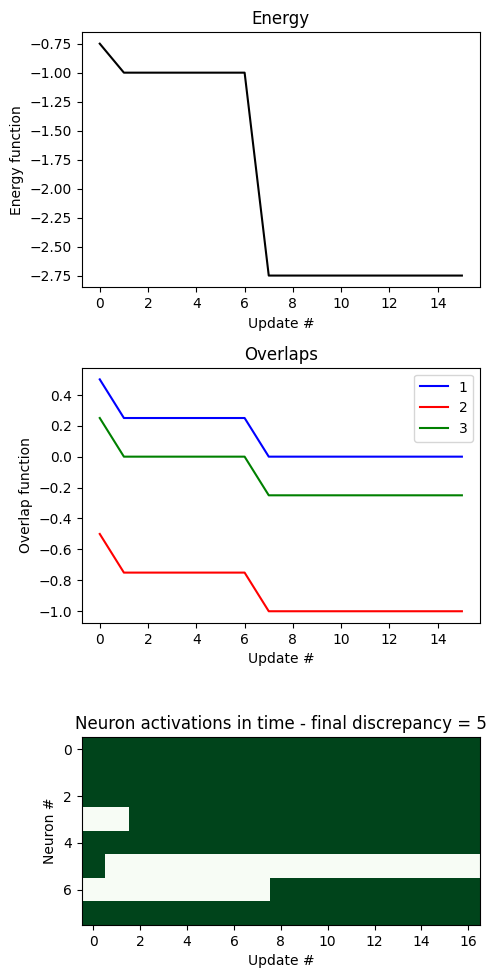

In [341]:
retrieval(p1d, p1, colormap='Blues')
plt.savefig('bonus_track_1_p1',format='pdf')

retrieval(p2d, p2, colormap='Reds')
plt.savefig('bonus_track_1_p2',format='pdf')


retrieval(p3d, p3, colormap='Greens')
plt.savefig('bonus_track_1_p3',format='pdf')


# The recall is not always perfect, it changes every time the code runs.
# I suppose it depends on the order in wich I choose to update the neurons, that, being random, changes at every run.